In [704]:
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from collections import Counter
import matplotlib.pyplot as plt
import os
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
import numpy as np
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from collections import defaultdict
import pandas as pd
from difflib import SequenceMatcher

In [698]:
#Function for calculating most common length of sequences
def get_most_common_length(input_file):
    lengths = []
    for record in SeqIO.parse(input_file, 'fasta'):
        lengths.append(len(record.seq))
    
    length_counts = Counter(lengths)
    most_common_length = length_counts.most_common(1)[0][0]
    
    return lengths

#Function for making plot graph
def plot_sequence_length_distribution(filename):
    records = list(SeqIO.parse(filename, "fasta"))
    most_common_length = get_most_common_length(filename)

    sequence_lengths = [len(record.seq) for record in records]
    length_counts = Counter(sequence_lengths)

    unique_lengths = sorted(length_counts.keys())
    max_count = max(length_counts.values())

    counts = [length_counts.get(length, 0) for length in range(max(unique_lengths) + 1)]

    x_values = range(len(counts))
    x_tick_positions = [0, 100, 200, 300, 400] 
    x_tick_labels = [str(position) for position in x_tick_positions] 
    x_values = range(len(counts))

    plt.bar(x_values, counts)
    plt.xticks(x_tick_positions, x_tick_labels)

    plt.ylabel('Count')
    plt.xlabel('Sequence Length')

    plt.title(filename)
    plt.show()

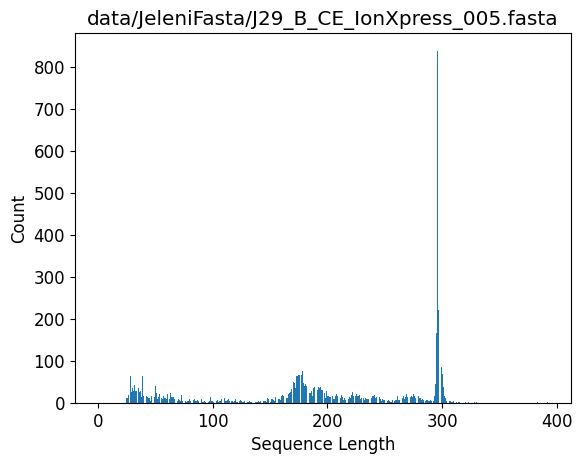

In [699]:
filename = "data/JeleniFasta/J29_B_CE_IonXpress_005.fasta"
plot_sequence_length_distribution(filename)

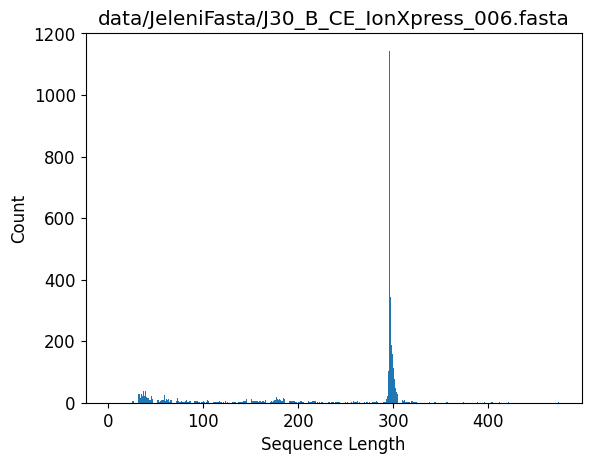

In [700]:
filename = "data/JeleniFasta/J30_B_CE_IonXpress_006.fasta"
plot_sequence_length_distribution(filename)

In [ ]:
#Filter sequences by most common length and +/- 5

def get_most_common_length(input_file):
    lengths = []
    for record in SeqIO.parse(input_file, 'fasta'):
        lengths.append(len(record.seq))
    
    length_counts = Counter(lengths)
    most_common_length = length_counts.most_common(1)[0][0]
    
    return most_common_length


def filter_sequences_by_length(input_file, output_file, max_length, min_length):
    with open(output_file, 'w') as output_handle:
        sequences = SeqIO.parse(input_file, 'fasta')
        sequence_lengths = [len(seq.seq) for seq in sequences]
        average_length = sum(sequence_lengths) / len(sequence_lengths)
        print(max_length)
        
        sequences = SeqIO.parse(input_file, 'fasta')
        filtered_sequences = [seq for seq in sequences if len(seq.seq) <= max_length and len(seq.seq) >= min_length]
        SeqIO.write(filtered_sequences, output_handle, 'fasta')


#main
input_directory = "data/Jeleni"
output_directory = "data/JeleniFiltered"

for file_name in os.listdir(input_directory):
    input_file = os.path.join(input_directory, file_name)
    if os.path.isfile(input_file):
        if file_name.endswith(".fastq"):
            # Convert fastq to fasta
            fasta_file = os.path.join(output_directory, os.path.splitext(file_name)[0] + ".fasta")
            SeqIO.convert(input_file, "fastq", fasta_file, "fasta")

            #Calculate most common length
            most_common_length = get_most_common_length(fasta_file)
            max_length = most_common_length + 5
            min_length = most_common_length - 5

            #Filter sequences
            output_file = os.path.join(output_directory, os.path.splitext(file_name)[0] + "_filtered.fasta")
            filter_sequences_by_length(fasta_file, output_file, max_length, min_length)




Manjim programom koji radi na isti način kao naš algoritam grupiranja smo dobili sve ove parametre za kreiranje grafa.
Program best_cluster.py, zbog pozivanja alata MAFFT unutar njega mora se pokrenuti na UNIX sustavima.

[(0, 0, 5), (0, 1, 3), (0, 2, 3), (0, 5, 3), (0, 10, 5), (1, 0, 3), (1, 1, 4), (1, 2, 4), (1, 5, 3), (1, 10, 3), (2, 0, 3), (2, 1, 4), (2, 2, 3), (2, 5, 3), (2, 10, 5), (5, 0, 3), (5, 1, 2), (5, 2, 2), (5, 5, 2), (5, 10, 2), (10, 0, 365), (10, 1, 2), (10, 2, 2), (10, 5, 139), (10, 10, 2)]


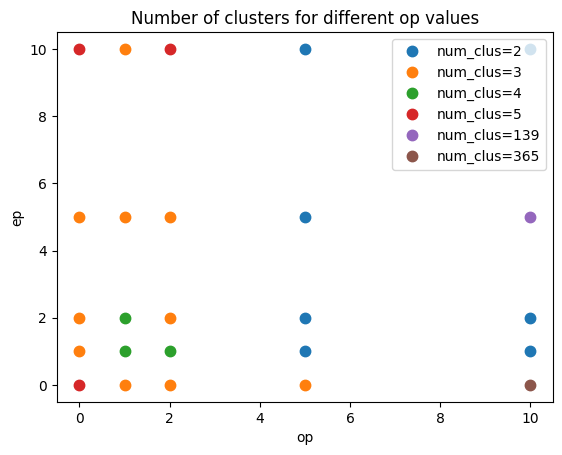

In [258]:
values = [0,1,2,5,10]
cluster_tuples = []
#Miniprogram that checks clusters for all of the parameters
cluster_values = [5,3,3,3,5,3,4,4,3,3,3,4,3,3,5,3,2,2,2,2,365,2,2,139,2]
counter = 0
for op in values:
    for ep in values:
        tup = tuple((op, ep, cluster_values[counter]))
        cluster_tuples.append(tup)
        counter += 1
print(cluster_tuples)

ops = [score[0] for score in cluster_tuples]
eps = [score[1] for score in cluster_tuples]
num_clusters = [score[2] for score in cluster_tuples]

#Create the graph
clusters = list(set(score[2] for score in cluster_tuples))
for clus in clusters:
    scores_for_clus = [(score[0], score[1]) for score in cluster_tuples if score[2] == clus]
    op_values = [score[0] for score in scores_for_clus]
    ep_values = [score[1] for score in scores_for_clus]
    plt.plot(op_values, ep_values,'.',markersize=15, label=f"num_clus={clus}")
    
plt.xlabel('op')
plt.ylabel('ep')
plt.title('Number of clusters for different op values')


plt.legend()

plt.savefig('num_clusters.png')
plt.show()


In [616]:
#Function for printing sequences records from fasta file
def print_sequence_records(fasta_file):
    for record in SeqIO.parse(fasta_file, 'fasta'):
        print(record.id)
        print(record.seq)
        print()


In [697]:
fasta_file1 = 'data/referenceJ29.fasta'
fasta_file2 = 'data/referenceJ30.fasta'

print_sequence_records(fasta_file1)
print()
print_sequence_records(fasta_file2)

J29B-1_M13F-pUC
CTGTATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTTCGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGGTGGCCGAGTACCTGAACAGCCAGAAGGAGTACATGGAGCAGACGCGGGCCGAGGTGGACACGTACTGCAGACACAACTACGGCGGCGTTGAGAGTTTCACTGTG

J29B-3_M13F-pUC
CTGTATACTACGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGTCCGCCAAGTACTGGAACAGCCAGAAGGAGTACATGGAGCAGACGCGGGCCGAGGTGGACAGGTACTGCAGACACAACTACGGGGTTCTTGACAGTTTCGCTGTG

J29B-6_M13F-pUC
GAGCATCATAAGTGCGAGTGTCATTTCTCCAACGGGACGGAGCGGGTGCAGTTCCTGCAGAGATACATCTATAACCGGGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGTCCGCCAAGTACTATAACAGCCAGAAGGAGCTCCTGGAGCAGAAGCGGGCCGCGGTGGACAGGTACTGCAGACACAACTACGGGGTCGTTGAGAGTTTCACTGTG


J30B-1_M13F-pUC
GAGTATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGCGGTTCCTGGACAGATACTTCTATAACCGGGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTTCCGGGCGGTGACCGAGCTGGGGCGGCCGTCCGCCAAGTACTGGAACAGCCAGAAGGATTTCATGGA

In [701]:
#Function for calculating occurence of a sequence
def count_sequence_occurrences(sequence_file, reference_file, similarity_threshold=0.95):
    # Read the reference sequences
    reference_sequences = []
    for record in SeqIO.parse(reference_file, 'fasta'):
        reference_sequences.append(str(record.seq).upper())

    sequences = []
    for record in SeqIO.parse(sequence_file, 'fasta'):
        sequences.append(str(record.seq).upper())

    occurrence_counts = {}
    for ref_seq in reference_sequences:
        count = sum(1 for seq in sequences if is_similar_sequence(seq, ref_seq, similarity_threshold))
        occurrence_counts[ref_seq] = count

    return occurrence_counts

#Function to check similarity between sequences
def is_similar_sequence(sequence, reference_sequence, similarity_threshold):
    alignment = align.globalms(reference_sequence, sequence, 2, -1, -0.5, -0.1)
    best_alignment = alignment[0]
    alignment_length = max(len(best_alignment[0]), len(best_alignment[1]))
    max_possible_score = min(len(reference_sequence), len(sequence)) * 2
    similarity = best_alignment[2] / max_possible_score
    #print(similarity)
    return similarity >= similarity_threshold

#Function to create bar plot
def plot_occurrence_graph(occurrence_counts):
    reference_sequences = list(occurrence_counts.keys())
    counts = list(occurrence_counts.values())

    plt.bar(range(len(reference_sequences)), counts, align='center')
    plt.xticks(range(len(reference_sequences)))
    plt.xlabel('Reference sequences')
    plt.ylabel('Occurrence count')
    plt.title('Occurrences of reference sequences')
    #plt.savefig('occurencesJ29.png')
    plt.show()




{'CTGTATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTTCGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGGTGGCCGAGTACCTGAACAGCCAGAAGGAGTACATGGAGCAGACGCGGGCCGAGGTGGACACGTACTGCAGACACAACTACGGCGGCGTTGAGAGTTTCACTGTG': 1409, 'CTGTATACTACGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGTCCGCCAAGTACTGGAACAGCCAGAAGGAGTACATGGAGCAGACGCGGGCCGAGGTGGACAGGTACTGCAGACACAACTACGGGGTTCTTGACAGTTTCGCTGTG': 233, 'GAGCATCATAAGTGCGAGTGTCATTTCTCCAACGGGACGGAGCGGGTGCAGTTCCTGCAGAGATACATCTATAACCGGGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGTCCGCCAAGTACTATAACAGCCAGAAGGAGCTCCTGGAGCAGAAGCGGGCCGCGGTGGACAGGTACTGCAGACACAACTACGGGGTCGTTGAGAGTTTCACTGTG': 4}


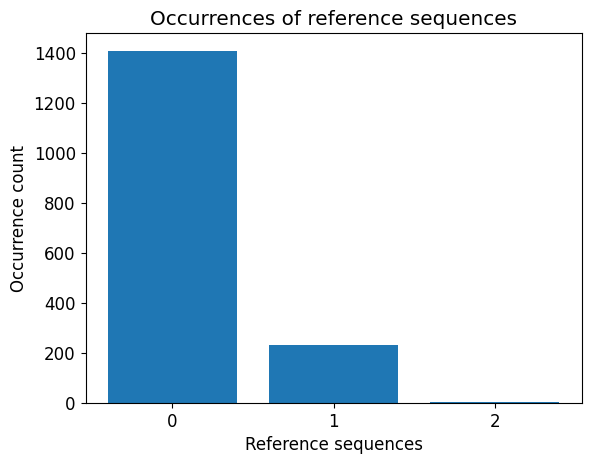

In [696]:
sequence_file = 'data/JeleniFiltered/J29_B_CE_IonXpress_005.fasta'
reference_file = 'data/referenceJ29.fasta'

#Count occurrences of reference sequences in the file - J29_B_CE_IonXpress_005
occurrence_counts = count_sequence_occurrences(sequence_file, reference_file)
print(occurrence_counts)
plot_occurrence_graph(occurrence_counts)

{'GAGTATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGCGGTTCCTGGACAGATACTTCTATAACCGGGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTTCCGGGCGGTGACCGAGCTGGGGCGGCCGTCCGCCAAGTACTGGAACAGCCAGAAGGATTTCATGGAGCAGAAGCGGGCCGAGGTGGACACGGTGTGCAGACACAACTACGGGGTTATTGAGAGTTTCACTGTG': 1188, 'GAGCATCTTAAGGCCGAGTGTCATTTCTTCAACGGGACGGAGCGGATGCAGTTCCTGGCGAGATACTTCTATAACGGAGAAGAGTACGCGCGCTTCGACAGCGACGTGGGCGAGTTCCGGGCGGTGACCGAGCTGGGGCGGCCGGACGCCAAGTACTGGAACAGCCAGAAGGAGATCCTGGAGCAGCACCGGGCAGAGGTGGACAGGTACTGCAGACACAACTACGGGGTCGGTGAGAGTTTCACTGTG': 943, 'ATGTATACTAAGAAAGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGCTCCTGGACAGATACTTCTATAACGGAGAAGAGTTCGTGCGCTTCGACAGCGACTGGGGCGAGTTCCGGGCGGTGACCGAGCTGGGGCGGCCGGCGGCCGAGGGCTGGAACAGCCAGAAGGAGCTCCTGGAGCAGAGGCGGGCCGCGGTGGACACGTACTGCAGACACAACTACGGGGTTATTGAGAGTTTCACTGTG': 18}


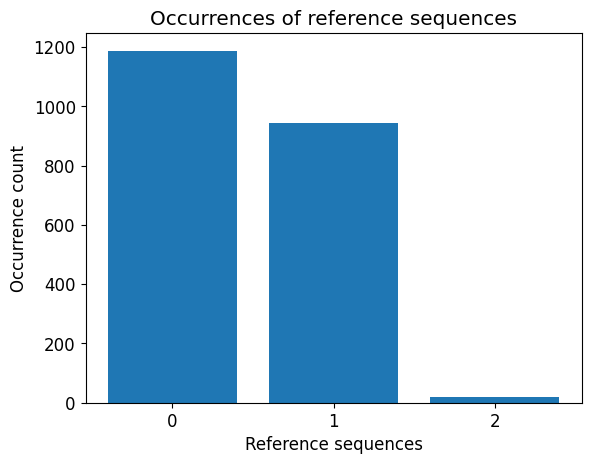

In [627]:
sequence_file = 'data/JeleniFiltered/J30_B_CE_IonXpress_006.fasta'
reference_file = 'data/referenceJ30.fasta'

#Count occurrences of reference sequences in the file - J30_B_CE_IonXpress_006
occurrence_counts = count_sequence_occurrences(sequence_file, reference_file)
print(occurrence_counts)
plot_occurrence_graph(occurrence_counts)

Prije izračuna matrice udaljenosti trebamo napraviti višestruko poravnanje sekvenci pomoću alata MAFFT. Alat MAFFT možemo pokrenuti iz komandne linije ili iz python skripte na ovaj način: 
    command = f"mafft --op 2 --ep 0 --auto --reorder {input_file} > {output_file}"
    subprocess.run(command, shell=True)
Python skripta mora biti pokrenuta na operacijskim UNIX sustavu zbog alata MAFFT.

In [69]:
#Calculating distance matrix for specific file
filename = "data/MSA/J29_B_CE_IonXpress_005.fasta"
alignment = AlignIO.read(filename, "fasta")

#Calculate distance matrix
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)

In [635]:
#Read matrix from the file
distance_matrix = np.loadtxt("data/J30/distance_matrix_op5_ep0.txt")

In [636]:
#Calculate average silhouette scores for different distance thresholds
max_distance = np.max(distance_matrix)
thresholds = np.linspace(0, max_distance, num=50)  
silhouette_scores = []

distance_matrix = np.asarray(distance_matrix)

for threshold in thresholds:
    clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='complete', distance_threshold=threshold)
    labels = clustering.fit_predict(distance_matrix)
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    valid_labels = unique_labels[label_counts > 1]

    if len(valid_labels) >= 2:
        valid_indices = np.isin(labels, valid_labels)
        valid_distance_matrix = distance_matrix[valid_indices][:, valid_indices]
        valid_labels = labels[valid_indices]

        silhouette_scores.append(silhouette_score(valid_distance_matrix, valid_labels))
    else:
        silhouette_scores.append(-1)

#Determine optimal distance threshold based on average silhouette score
best_threshold_index = np.argmax(silhouette_scores)
distance_threshold = thresholds[best_threshold_index]

print("Optimal Distance Threshold:", distance_threshold)

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.19343838801343322


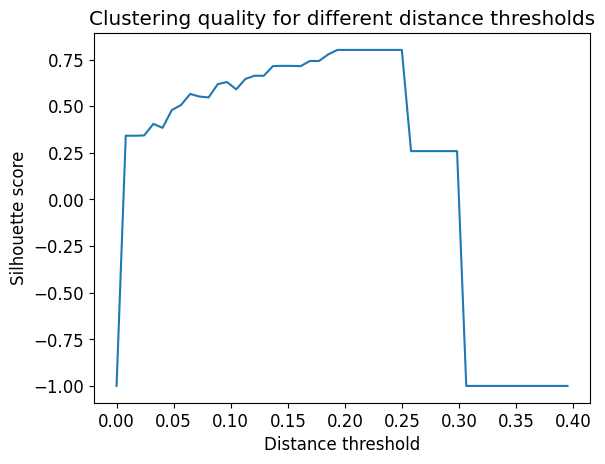

In [566]:
# Plot silhouette scores
plt.plot(thresholds, silhouette_scores)
plt.xlabel('Distance threshold')
plt.ylabel('Silhouette score')
plt.title('Clustering quality for different distance thresholds')
plt.savefig('J30_op5_ep0.pdf')
plt.show()


In [637]:
optimal_threshold =  distance_threshold

#Clustering using optimal threshold and distance matrix
clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='complete', distance_threshold=optimal_threshold)
labels = clustering.fit_predict(distance_matrix)

#unique clusters and their members
unique_labels, label_counts = np.unique(labels, return_counts=True)

for label, count in zip(unique_labels, label_counts):
    cluster_members = np.where(labels == label)[0]
    print(f"Cluster {label}: {count} members")
    print(cluster_members)
    print() 

Cluster 0: 19 members
[2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 2072
 2148 2149 2160 2161 2163]

Cluster 1: 942 members
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  16

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [702]:
#Function for finding most common sequence
def get_most_common_sequence(cluster_sequences):
    sequence_counts = Counter(str(record.seq) for record in cluster_sequences)
    most_common_sequence, count = sequence_counts.most_common(1)[0]
    
    return most_common_sequence

In [638]:
#Find represent of each cluster
alignment = AlignIO.read("data/MSA/J30_B_CE_IonXpress_006.fasta", "fasta")
alignment_array = np.array([list(rec) for rec in alignment])
cluster_sequences = {}

for cluster_label in np.unique(labels):
    cluster_members = np.where(labels == cluster_label)[0].tolist()
    if len(cluster_members) >= 100:
    
        #Get sequences of current cluster
        cluster_indices = np.where(labels == cluster_label)[0]
        cluster_seqs = alignment_array[cluster_indices]
        cluster_seq = [alignment[i] for i in cluster_members]

        #Calculate consensus sequence for current cluster  
        sequence = get_most_common_sequence(cluster_seq)
        consensus_seq = sequence
    else:
        #Get sequences of current cluster
        cluster_indices = np.where(labels == cluster_label)[0]
        cluster_seqs = alignment_array[cluster_indices]
        cluster_seq = [alignment[i] for i in cluster_members]

        #Calculate consensus sequence for current cluster
        consensus_seq = ''
        for i in range(cluster_seqs.shape[1]):
            column = cluster_seqs[:, i]
            unique_residues, residue_counts = np.unique(column, return_counts=True)
            most_common_residue = unique_residues[np.argmax(residue_counts)]
            consensus_seq += most_common_residue  
            
    #Store consensus sequence in dictionary
    cluster_sequences[cluster_label] = consensus_seq

#Print cluster label and its represent
for cluster_label, consensus_seq in cluster_sequences.items():
    print("Cluster:", cluster_label)
    print("Consensus Sequence:", consensus_seq)
    print()

Cluster: 0
Consensus Sequence: ---gatcctctctctgcagcaca----tttcct-gatgtatactaaga-aagagtgtca--ttt--ctcc----aac-ggga--c-gc--agc-gggt-ggggctcc--tgga-cagatacttct-at-aa-cg-gag-aa-g-agttcgtgc-gcttcgacagcg-act---g-ggg-cgag-ttcc--ggg-cg--gtga---ccgagct--ggggc-gg--cc-gg-acgccgagg-ct-ggaacag-acagaa-gga--gctcctggag--caga--gg-c-ggg---cc-gcggt-ggacacg---tac-tgcagac-ac-aactac--gggg--ttat-t--gag--ag--tttcact-gt-gc-agcgg-cgaggtgacgcgaa----

Cluster: 1
Consensus Sequence: ---gatcctctctctgcagcaca----tttcct-ggagcatcttaagg-ccgagtgtca--ttt--cttc----aac-ggga--c-gg--agc-ggat-gcagttcc--tggc-gagatacttct-at-aa-cg-gag-aa-g-agtacgcgc-gcttcgacagcg-acg---t-ggg-cgag-ttcc--ggg-cg--gtga---ccgagct--ggggc-gg--cc-gg-acgccaagtact-ggaacag-ccagaa-gga--gatcctggag--cagc--ac-g-ggg---ca-gaggt-ggacagg---tac-tgcagac-ac-aactac--gggg--tcgg-t--gag--ag--tttcact-gt-gc-agcgg-cgaggtgacgcgaa----

Cluster: 2
Consensus Sequence: ---gatcctctctctgcagcaca----tttcct-ggagtatgctaaga-gcgagtgtca--ttt--ctcc----aac-ggga--c-gc--agc-gggt-gcggttcc--tgga

In [639]:
#Print cluster labels and their represent without gaps
for cluster_label, consensus_seq in cluster_sequences.items():
    print("Cluster:", cluster_label)
    consensus_seq = consensus_seq.replace("-", "")
    print("Consensus Sequence:", consensus_seq)
    print()

Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctgatgtatactaagaaagagtgtcatttctccaacgggacgcagcgggtggggctcctggacagatacttctataacggagaagagttcgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccggacgccgaggctggaacagacagaaggagctcctggagcagaggcgggccgcggtggacacgtactgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcttaaggccgagtgtcatttcttcaacgggacggagcggatgcagttcctggcgagatacttctataacggagaagagtacgcgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcagcacggggcagaggtggacaggtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 3
Con

In [703]:
#Compare representatives and reference genoms
seq1 = 'CTGTATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTTCGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGGTGGCCGAGTACCTGAACAGCCAGAAGGAGTACATGGAGCAGACGCGGGCCGAGGTGGACACGTACTGCAGACACAACTACGGCGGCGTTGAGAGTTTCACTGTG'
seq2 = 'CTGTATACTACGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGTCCGCCAAGTACTGGAACAGCCAGAAGGAGTACATGGAGCAGACGCGGGCCGAGGTGGACAGGTACTGCAGACACAACTACGGGGTTCTTGACAGTTTCGCTGTG'
seq3 = 'GAGCATCATAAGTGCGAGTGTCATTTCTCCAACGGGACGGAGCGGGTGCAGTTCCTGCAGAGATACATCTATAACCGGGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGTCCGCCAAGTACTATAACAGCCAGAAGGAGCTCCTGGAGCAGAAGCGGGCCGCGGTGGACAGGTACTGCAGACACAACTACGGGGTCGTTGAGAGTTTCACTGTG'
seq1 = seq1.lower()
seq2 = seq2.lower()
seq3 = seq3.lower()
seqJ29 = [seq1, seq2, seq3]

seqJ30_1 = 'GAGTATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGCGGTTCCTGGACAGATACTTCTATAACCGGGAAGAGTACGTGCGCTTCGACAGCGACTGGGGCGAGTTCCGGGCGGTGACCGAGCTGGGGCGGCCGTCCGCCAAGTACTGGAACAGCCAGAAGGATTTCATGGAGCAGAAGCGGGCCGAGGTGGACACGGTGTGCAGACACAACTACGGGGTTATTGAGAGTTTCACTGTG'
seqJ30_2 = 'GAGCATCTTAAGGCCGAGTGTCATTTCTTCAACGGGACGGAGCGGATGCAGTTCCTGGCGAGATACTTCTATAACGGAGAAGAGTACGCGCGCTTCGACAGCGACGTGGGCGAGTTCCGGGCGGTGACCGAGCTGGGGCGGCCGGACGCCAAGTACTGGAACAGCCAGAAGGAGATCCTGGAGCAGCACCGGGCAGAGGTGGACAGGTACTGCAGACACAACTACGGGGTCGGTGAGAGTTTCACTGTG'
seqJ30_3 = 'ATGTATACTAAGAAAGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGCTCCTGGACAGATACTTCTATAACGGAGAAGAGTTCGTGCGCTTCGACAGCGACTGGGGCGAGTTCCGGGCGGTGACCGAGCTGGGGCGGCCGGCGGCCGAGGGCTGGAACAGCCAGAAGGAGCTCCTGGAGCAGAGGCGGGCCGCGGTGGACACGTACTGCAGACACAACTACGGGGTTATTGAGAGTTTCACTGTG'

seqJ30_1 = seqJ30_1.lower()
seqJ30_2 = seqJ30_2.lower()
seqJ30_3 = seqJ30_3.lower()
seqJ30 = [seqJ30_1, seqJ30_2, seqJ30_3]

for cluster_label, consensus_seq in cluster_sequences.items():
    consensus_seq = consensus_seq.replace("-", "")
    print("Cluster:", cluster_label)
    #Change seqJ30 based on which sample are we analyzing
    for seq in seqJ30:
        if consensus_seq.lower().find(seq) != -1:
            print(True)
        else:
            print(False)

print(seqJ30_2.lower())

Cluster: 0
False
False
False
Cluster: 1
True
False
False
Cluster: 2
False
True
False
Cluster: 3
False
False
False
Cluster: 4
False
False
False
gagcatcttaaggccgagtgtcatttcttcaacgggacggagcggatgcagttcctggcgagatacttctataacggagaagagtacgcgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcagcaccgggcagaggtggacaggtactgcagacacaactacggggtcggtgagagtttcactgtg


Prije procesa grupiranja za sve uzorke trebamo napraviti višestruko poravnanje sekvenci za svaki uzorak. To smo napravili pomoću miniprograma running_mafft.py koji zbog alata MAFFT mora biti pokrenut na UNIX sustavima.

In [ ]:
#Calculating distance matrices for all files and outputing them in a file

#Directory containing alignment files
directory = "data/MSA"

for filename in os.listdir(directory):
    if filename.endswith(".fasta") or filename.endswith(".fa") or filename.endswith(".aln"):
        file_path = os.path.join(directory, filename)
        print("working on file {}".format(file_path))

        alignment = AlignIO.read(file_path, "fasta")
        
        #Calculate distance matrix
        calculator = DistanceCalculator('identity')
        distance_matrix = calculator.get_distance(alignment)
    
        output_file = os.path.splitext(filename)[0] + "_distance_matrix.txt"
        with open(output_file, "w") as f:
            for row in distance_matrix:
                f.write("\t".join(map(str, row)) + "\n")

In [653]:
#Clustering for all samples and saving all of their representatives in dictionary
directory = 'data/allFilesDm'
representatives = {}
occur_representatives = defaultdict(int)

#Calculate average silhouette scores for different distance thresholds
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)

        distance_matrix = np.loadtxt(file_path)

        #Average silhouette scores
        max_distance = np.max(distance_matrix)
        thresholds = np.linspace(0, max_distance, num=50) 
        silhouette_scores = []

        distance_matrix = np.asarray(distance_matrix)

        for threshold in thresholds:
            clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='complete', distance_threshold=threshold)
            labels = clustering.fit_predict(distance_matrix)
            unique_labels, label_counts = np.unique(labels, return_counts=True)
            valid_labels = unique_labels[label_counts > 1]

            if len(valid_labels) >= 2:
                valid_indices = np.isin(labels, valid_labels)
                valid_distance_matrix = distance_matrix[valid_indices][:, valid_indices]
                valid_labels = labels[valid_indices]

                silhouette_scores.append(silhouette_score(valid_distance_matrix, valid_labels))
            else:
                silhouette_scores.append(-1)

        #Determine optimal distance threshold based on average silhouette score
        best_threshold_index = np.argmax(silhouette_scores)
        distance_threshold = thresholds[best_threshold_index]

        print("Optimal Distance Threshold:", distance_threshold)

        optimal_threshold =  distance_threshold

        #Clustering
        clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='complete', distance_threshold=optimal_threshold)
        labels = clustering.fit_predict(distance_matrix)
        unique_labels, label_counts = np.unique(labels, return_counts=True)
        
        
        #Find repesentatives of clusters
        base_name = os.path.splitext(filename)[0]
        #Extract first part of filename
        first_part = base_name.split("_distance_matrix")[0]
        alignment = AlignIO.read(f"data/MSA/{first_part}.fasta", "fasta")
        alignment_array = np.array([list(rec) for rec in alignment])
        cluster_sequences = {}

        for cluster_label in np.unique(labels):
            cluster_members = np.where(labels == cluster_label)[0].tolist()
            if len(cluster_members) >= 100:  
                #Get sequences of the current cluster
                cluster_indices = np.where(labels == cluster_label)[0]
                cluster_seqs = alignment_array[cluster_indices]
                cluster_seq = [alignment[i] for i in cluster_members]

                sequence = get_most_common_sequence(cluster_seq)      
                consensus_seq = sequence
            else:
                #Get sequences of current cluster
                cluster_indices = np.where(labels == cluster_label)[0]
                cluster_seqs = alignment_array[cluster_indices]
                cluster_seq = [alignment[i] for i in cluster_members]

                #Calculate consensus sequence for current cluster
                consensus_seq = ''
                for i in range(cluster_seqs.shape[1]):
                    column = cluster_seqs[:, i]
                    unique_residues, residue_counts = np.unique(column, return_counts=True)
                    most_common_residue = unique_residues[np.argmax(residue_counts)]
                    consensus_seq += most_common_residue        
            #Store consensus sequence in dictionary
            cluster_sequences[cluster_label] = consensus_seq

        temp_seqs = []
        for cluster_label, consensus_seq in cluster_sequences.items():
            print("Cluster:", cluster_label)
            consensus_seq = consensus_seq.replace("-", "")
            print("Consensus Sequence:", consensus_seq)
            print()
            
        #Store representatives and their occurrences
        for cluster_label, consensus_seq in cluster_sequences.items():
            consensus_seq = consensus_seq.replace("-", "")
            occur_representatives[consensus_seq] += 1
        
        representatives[filename] = temp_seqs

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.15912925170068024
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcttaaggccgagtgtcatttcttcaacgggacggagcggatgcagttcctggcgagatacttctataacggagaagagtacgcgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcagcaccgggcagaggtggacaggtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacattttcctggagtatgctaagagcgagtgtcattttctccaacgggacgcagcggggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactgggggcgagttccggggcggtgaccgagctgggggcggccgtccgccaaagtactggaacagccagaaggattttcatggagcagaagcgggccgaaggtggacacggtgtgcagacaacaactacg

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.4435564435564436
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctaccccaacgccatctccctgacccacggacccaccaggaaccccggaagcaccaggagcaggctctaccacaccaccacctggggattcccatcacgtggcatcaaaaccgggcacctgttgcccaagcctgaacttgacggaaaaacaaaaaggcacagccctacccggcgagcaggggcaaatccctgcccaccccccgcctgcaaccccaccacccctccaccggaaaggtcacaaaaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagttcgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccggtggccgagtacctgaacagccagaaggagtacatggagcagacgcgggccgaggtggacacgtactgcagacacaactacggcggcgttgagagtttcactgtgcagcggcgaggtgacgcgaa



C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.13917108693697744
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcttaaggccgagtgtcatttcttcaacgggacggagcggatgcagttcctggcgagatacttctataacggagaagagtacgcgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctgggggcggccggacgccaagtactggaacagccagaaggagatcctggagcagcaccgggcagaggtggacaggtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctcattttataaaaccaagtggaggatctatgagcatcctcctttcacttctaaagagctcatggttctagctcggtccctgggcataggttaaagaaatcaagagattgggtttcatttcataacttgggcctctgaacacttcctagttgggtctgggaacagaaacaggcactcaatgaccaagctaatctgagtttcagggaggtggccagccgccttggctgctggaaacttc

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.12142156633820579
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcagttcctgcagagatacatctataaccgggaagagtacgcgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcgggcgcgggccgaggtggacacggtgtgcagacacaactacggggtttttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcttaaggccgagtgtcatttcttcaacgggacggagcggatgcagttcctggcgagatacttctataacggagaagagtacgcgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcagcaccgggcagaggtggacaggtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattga

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.15173792860083518
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatcataagagcgagtgtcatttcttcaacgggacggagcgggtgcggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggagatcctggagcagaagcgggccgaggtggacacgttctgcagacacaactacggggtcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccgtccgccaagtactggaacagccagaaggagtacatggagcagacgcgggccgaggtggacaggtactgcagacacaactacggggttcttgacagtttcgctggtgcagcggtcgaggtgacgcgaa

Optimal Distance Threshold: 0.11325611325611326


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatcataagagcgagtgtcatttcttcaacgggaccgagcgggtgcggttcctggacagatacttccataatggagaagagttcgtgcgcttcaacagcgactggggcgagtaccgggcggtggccgagctggggcggccggccgccgagcactggaacagccagaaggagattctggagcagaggcgggccgaggtggacacggtgtgcagacacaactacggggtcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcagttcctgcagagatacatctataaccgggaagagtacgcgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcgggcgcgggccgaggtggacacggtgtgcagacacaactacggggtttttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcagttcctgcagagatacatctataaccgggaagagtacgcgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctgggggcggccgggacgccaagtactggaacagccagaaggagatcctggagcggggcgcggggccgaggtgggacacgggtgtgcagacacaactacggggggtttttttgagagttttcacatttttcgggggat



C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.14471243042671608
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatactaagagcgagtgtcatttcttcaacgggacgcagcgggtgcggttcctggacagatacttctataatggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccggacgccgagctctggaacagccagaaggagatcctggagcagaggcgggccgaggtggacacgtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctgctgcatattaaggccgaatgtcatttctccaacgggacgcagcgggtggggtacctggagagacacatctataacggagaagagttcctgcgcttcgacagcgacgtgggcgagtaccgggcggtgaccgagctggggcgtccggaggccaagtcctggaacagccagaaggagctcctggaggagaggcgggccgcggtgaacacgtactgcagatacaactacggggtcggtga

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcataagtgcgagtgtcatttctccaacgggacggagcgggtgcagttcctgcagagatacatctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccgtccgccaagtactataacagccagaaggagctcctggagcagaagcgggccgcggtggacaggtactgcagacacaactacggggtcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctcagtttctcacctgaggggtattcttagagatggcctgtaaattaggttttttttaatcatcattttttttctttgtttaaacttattcgtttttgattgaagggtaattgtgttacaatatagtgttggtttctgccacatatcagcatgaatcagccatacgtgtacacgtgttcccccctcttcgaacctctctccccacctcccatctaaatgagatcgttgtaaactaggtgacgtgtccgggcactatgtggtccatggtcagggtggc

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccgtccgccaagtactggaacagccagaaggagtacatggagcagacgcgggccgaggtggacaggtactgcagacacaactacggggttcttgacagtttcgctggtgcagcggtcgaggtgacgcgaa

Optima

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.1546803223134272


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatcataagagcgagtgtcatttctccaacgggacgcagcgggtggggtacctggagagatacatctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccgtctgccaagtacaggaacagccagaaggagctcctggagcagaagcgggccgaggtggacacgtactgcagatacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctcctccaggggatcttcctgacccagggatcaaacccaagtctcctgtgtctcctgcactggcaggcgggttctttgccactagcgccaccggggaagcccacaggagatggggaagctgatggcaaaggagcatctttgcggtgatggtcaccaacacaggtgatgacatgactcatctatacacacagactgtgccaggccagcctcctgatcatgatcttgtacgacagttacatgagacgtgaccacagcggcgagtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttccttctccaaggtaccaagagagaaatgtaaaaatgaagtaaaaatgttttgtgtcaacacaaagaagtaaaaatttaacttacatttgtgggcattaaaaaaatgccttagcggatgtaactgatatctgagctgggcctagtggaataggttagtctatagggaggagaaacagaatgaggaactgccaaagaaaaaagtataaacagataagggagaaagagcagaaaaaatcgtacctggggaatgatgtataatcaagcttagtttcg

Cluster: 3
Cons

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.4190277363555025


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttccttaagggtccctcccactccagcagaggtgagcggagtcttaaccacgaaaccaccaggaaacccatgtgtcagcaaaatgtaaaaaacagtccaaaaaaaaaattgaaatagtttttatacaacaggaccggggcagatgcaaatacagaggaaaaagaccgcaaaacaactaaaagtacaaaagtgcgactccaacttccaaacaacgggcagcggcgaggtgacgccaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Optimal Distance Threshold: 0.05359413795191669


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagttcgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccggtggccgagtacctgaacagccagaaggagtacatggagcagacgcgggccgaggtggacacgtactgcagacacaactacggcggcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggggtacctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccggacgccgagtactggaacagccagaaggagctcctggagcggaagcgggccaatgtggacacgtactgcagacacaactacggggtctttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctcctctgcagcacatttcctgctgtatactacgagcgagcgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccgtccgccaagtactggaacagccagaaggagaaaagggagcagacgcgggaccaggtggacaggtacgtgcagacacaactacggggttcttgacagtttcgctggtgtcagcggtcgaggtgacgccaa

Cluster: 3

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.1507167418389675


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcagttcctgcagagatacatctataaccgggaagagtacgcgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcgggcgcgggccgaggtggacacggtgtgcagacacaactacggggtttttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcttaaggccgagtgtcatttcttcaacgggacggagcggatgcagttcctggcgagatacttctataacggagaagagtacgcgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcagcaccgggcagaggtggacaggtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa



C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.12231815803244374


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatcctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataacggagaagagttcgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccggccgccgagtactggaacagccagaaggagatcctggagcagaagcgggccgaggtggacacgtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccgtccgccaagtactggaacagccagaaggagtacatggagcagacgcgggccgaggtggacaggtactgcagacacaactacggggttattgagagtttcgctggtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 3
C

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Optimal Distance Threshold: 0.10996581373666217
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcttaaggccgagtgtcatttctccaacgggacggagcgggtgcagttcctggagagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggagttcatggagcagaagcgggccgaggtggacaggtactgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccgtccgccaagtactggaacagccagaaggagtacatggagcagacgcgggccgaggtggacaggtactgcagacacaactacggggttcttga

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.10661834827388898


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagttcgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccggtggccgagtacctgaacagccagaaggagtacatggagcagacgcgggccgaggtggacacgtactgcagacacaactacggcggcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccgtccgccaagtactggaacagccagaaggagtacatggagcagacgcgggccgaggtggacaggtactgcagacacaactacggggttcttgacagtttcgctggtgcagcggtcgaggtgacgcgaa

Cluster: 3


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.10233236151603499
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcaaaaaaaatttttttgggggggttttttttaaaaaaaacccccccaaaaaaaaggggggggccccccctttttttaaaaaaaaccccccccggggggggtttttttaaaaaaaacccccccggggggggttttttttccccccccttttttttggggggggaaaaaaaggggggggccccccccaaaaaaaaattttttcccccccggggggaaaaaaattttttcccccccggggggaaaaaaattttttgggggggtttttttaaaaaaaccccccaaaaaaag

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcttaaggccgagtgtcatttcttcaacgggacggagcggatgcagttcctggcgagatacttctataacggagaagagtacgcgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcagcaccgggcagaggtggacaggtactgcagacacaactacggggtcg

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.1337428175153557
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcataagtgcgagtgtcatttctccaacgggacggagcgggtgcagttcctgcagagatacatctataaccgagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccgtccgccgagtactggaacagccagaaggagttcctggagcagaagcgggccgaggtggacacgtactgcagacacaactacggggtcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagttcgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccggtggccgagtacctgaacagccagaaggagtacatggagcagacgcgggccgaggtggacacgtactgcagacacaactacggcggcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccgtccgccaagtactggaacagccagaaggagtacatggagcagacgcgggccgaggtggacaggtactgcagacacaactacggggttcttgac

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.11446948447625495
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctgttgctacagtgacctcaggatccctccagccttgaaacagtgttcttggggtttctctggagtgccatcaaggaaatcaaggctcctttcatgtgtgatgtgcaacaaggaattgctctgcacacagtgcaggggaatcgggcctcatctcgcggcgagggggaagtctcatggtttttctcgagttgcggcgggaacctggggtatattctcgagttacgacggggatggcccttccacccacgtgtttgttcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcttaaggccgagtgtcatttcttcaacgggacggagcggatgcagttcctggcgagatacttctataacggagaagagtacgcgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcagcaccgggcagaggtggacaggtactgcagacacaactacggggtcg

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.12444001991040321
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgagcacatttcctggagcatcttaaggccgagtgtcatttcttcaacggggacggagcggatgcagttcctggcgagatacttctataacggagaagagtacgcgcgcttcgacagcgacgtgggggcgagttttccgggggcgggtgacccgagctgggggggcgggccccgggacgccaaagtactggggaaacagccccagaaggagatcctgggagcagcacccccggggggcggggagggtgggaacaggggtactgcagacacaaaacttacgggg

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcttaaggccgagtgtcatttcttcaacgggacggagcggatgcagttcctggcgagatacttctataacggagaagagtacgcgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcagcaccggggcagaggtggacaggtactgcagacacaactacggggtcggtgag

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.11653764954257564
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggggtacctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccggacgccgagtactggaacagccagaaggagctcctggagcggaagcgggccaatgtggacacgtactgcagacacaactacggggtctttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctgctgcatattaaggccgaatgtcatttctccaacgggacgcagcgggtggggtacctggagagacacatctataacggagaagagttcctgcgcttcgacagcgacgtgggcgagtaccgggcggtgaccgagctggggcgtccggaggccaagtcctggaacagccagaaggagctcctggaggagaggcgggccgcggtgaacacgtactgcagatacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatcataagagcgagtgtcatttctccaacgggacgcagcgggtggggtacctggagagatacatctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccgtctgccaagtacatgaatagccagaaggagctcctggagcggaagcgggccaatgtggacacgtactgcagatacaactacggggttattga

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.09505473348368998
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagttcgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccggtggccgagtacctgaacagccagaaggagtacatggagcagacgcgggccgaggtggacacgtactgcagacacaactacggcggcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagtattacaagagcgagtgtcatttcttcaacgggacgcagcgggtgcggttcctgcacagatgcttttctaatggagaagagaccgtgcgcttcgacagcgacgtgggcgagtaccgggcggtgacagagctggggcggccggacgccgagctctggaacagccagaaggagctcctggagcagaggcgggccgcggtggacacgtactgcagacacaactacggggtcggtga

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.09756779424098407
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccgtccgccaagtactggaacagccagaaggagtacatggagcagacgcgggccgaggtggacaggtactgcagacacaactacggggttcttgacagtttcgctggtgcagcggtcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctgctgcatattaaggccgaatgtcatttctccaacgggacgcagcgggtggggtacctggagagacacatctataacggagaagagttcctgcgcttcgacagcgacgtgggcgagtaccgggcggtgaccgagctggggcgtccggaggccaagtcctggaacagccagaaggagctcctggaggagaggcgggccgcggtgaacacgtactgcagatacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagttcgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccggtggccgagtacctgaacagccagaaggagtacatggagcagacgcgggccgaggtggacacgtactgcagacacaactacggcggcgtt

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.13030564338411424


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctgctgcatattaaggccgaatgtcatttctccaacgggacgcagcgggtggggtacctggagagacacatctataacggagaagagttcctgcgcttcgacagcgacgtgggcgagtaccgggcggtgaccgagctggggcgtccggaggccaagtcctggaacagccagaaggagctcctggaggagaggcgggccgcggtgaacacgtactgcagatacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatcataagagcgagtgtcatttctccaacgggacgcagcgggtggggtacctggagagatacatctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccgtctgccaagtacatgaatagccagaaggagctcctggagcggaagcgggccaatgtggacacgtactgcagatacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcttaaggccgagtgtcatttcttcaacgggacggagcggatgcagttcctggcgagatacttctataacggagaagagtacgcgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcagcaccgggcagaggtggacaggtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 3
Co

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.14027568067799911
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccgtccgccaagtactggaacagccagaaggagtacatggagcagacgcgggccgaggtggacaggtactgcagacacaactacggggttattgagagtttcgctggtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagcagcttaagggcgagtgtcatttctccaacgggacgcagcgggtgcggctcctgcagagatacatctataaccgggaagagtacgcgcgctacgacagcgactggggcgagttccgggcggtgacagagctggggcggccggacgccgagtactggaacagccagaaggagtacatggaggagttgcgggccgcggtggacacgtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatcataagagcgagtgtcatttcttcaacgggaccgagcgggtgcggttcctggacagatacttctataatggagaagagtacgtgcgcttcaacagcgactggggcgagtaccgggcggtggccgagctggggcggccggccgccgagtactggaacagccagaaggagattctggagcagacgcgggccgaggtggacacgtactgcagacacaactacggggtcgttg

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.11807580174927114
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggggtacctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccggacgccgagtactggaacagccagaaggagctcctggagcggaagcgggccaatgtggacacgtactgcagacacaactacggggtctttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgggcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtatcgggcggtgaccgagctggggcggccggacgccgagctctggaacagccagaaggagttcctggagcagaggcgggccgaggtggacacgtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagtattacaagagcgagtgtcatttcttcaacgggacgcagcgggtgcggttcctgcacagatgcttttctaatggagaagagaccgtgcgcttcgacagcgacgtgggcgagtaccgggcggtgacagagctggggcggccggacgccgagctctggaacagccagaaggagctcctggagcagaggcgggccgcggtggacacgtactgcagacacaactacggggtcggtga

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.12639146567717993


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggggtacctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccggacgccgagtactggaacagccagaaggagctcctggagcggaagcgggccaatgtggacacgtactgcagacacaactacggggtctttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatcataagagcgagtgtcatttctccaacgggacgcagcgggtggggtacctggagagatacatctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccgtctgccaagtacatgaatagccagaaggagctcctggagcggaagcgggccaatgtggacacgtactgcagatacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgggggtacctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactgggggcgagtaccgggcggtgaccgagctggggggcggccggacgccgagtactggaacagccagaaggagctcctggagcggaagcggggccgggggaaaaaagggggccccattttttcggggaaaattttttcggggaaaaatggggtaccccc

Cluster: 3
Consens

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.1248794413795764


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctgctgcatattaaggccgaatgtcatttctccaacgggacgcagcgggtggggtacctggagagacacatctataacggagaagagttcctgcgcttcgacagcgacgtgggcgagtaccgggcggtgaccgagctggggcgtccggaggccaagtcctggaacagccagaaggagctcctggaggagaggcgggccgcggtgaacacgtactgcagatacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatcataagagcgagtgtcatttctccaacgggacgcagcgggtggggtacctggagagatacatctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccgtctgccaagtacatgaatagccagaaggagctcctggagcggaagcgggccaatgtggacacgtactgcagatacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgggcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtatcgggcggtgaccgagctggggcggccggacgccgagctctggaacagccagaaggagttcctggagcagaggcgggccgaggtggacacgtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 3
Co

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.34787150692086705
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctgcagtatactaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttccaccccccggggggtttttcccccccttttggggggaaaaaaaggggcccccaaaaaaattttttccccccgggggaaaaaaattttccccccgggggggaaaaaaccggggtgacaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggagttcatggagcagacgcgggccgaggtggacacgtactgcagacacaactacggggttgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctcatgtgtttgcagttgagttgaacaggcagctgaaggatgggatggtgagctcagcattgctccctgtaatcgggagtcatgattgagctcctcatctccttcagctgctgtgagactttcagctgtgtctacctcaaggtgacctgtctggggtttcttttcctgtgggccccactgcaggtttctggaagaacttgactgcctgaaaggaagcgacgaaacatgaaaatcgctttgaggtgaccaacaagtccagcggcgaggtgacgcgaa



C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.4708454810495627
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctcttggaaagaacatccaacaagcccaggctaaaaccagcccttcccccctactgtcgggcaacatggacctccttctccacaaaacccagctcccctccgcctcacacaataacccctttccccaaaccgcgaggaaccccccaagagcacagaactcagagacaatcagctttaagaatccagcagccacgtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagttcgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagcttggggcggccggtggccgagtacctgaacagccagaaggagtacatggagcagacgcgggccgaggtggacacgtactgcagacacaactacggcggcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctgatgtcggtgacaaacacgtgggttgaagggccattcccgtcctacctcgagaatataccccaggttcccgccgcaactcgagaaaaaccatgagacttcccccctcgccgcgagatgaggcccgattcccctgcactgcatgcagagcaattccgtgttgcacatcaaagatgaaagaagccttgatttccttgatggcactccagagaaacccccaagaacactgtttcaaggctagagggaacccagcggcgaggtgacgcgaa



C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.10917293233082707


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatcataagagcgagtgtcatttctccaacgggacgcagcgggtggggtacctggagagatacatctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccgtctgccaagtacatgaatagccagaaggagctcctggagcggaagcgggccaatgtggacacgtactgcagatacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacattttcctggagtatcataagagcgagtgtcattttctccaacgggacgcagcgggtggggggggggtacctggagagatacatctataaccgggaagagtacgtgcgcttcgacagcgactgggggggggcgagtaccgggcggtgaccgagctgggggggggcggccgtctgccaagtacatgaatagccagaaggagctcctggagcggaaaaaaagcgggggggccaaaaaaatgtggacacgtactgcagatacaaaaaaactacgggg

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctgctgcatattaaggccgaatgtcatttctccaacgggacgcagcgggtggggtacctggagagacacatctataacggagaagagttcctgcgcttcgacagcgacgtgggcgagtaccgggcggtgaccgagctggggcgtccggaggccaagtcctggaacagccagaaggagctcctggaggagaggcgggccgcggtgaacacgtactgcagatacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 3
Conse

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.09525549350174851


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgggcgagtgtcatttccccaacgggacgcagcgggtggggttcctggacagatacctctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtatcgggcggtgaccgagctgggggccgccggacgccgagctctggaacagccagaaggagttcctggagcagaggcgggccgaggtggacacgtactgcagacacaactacggggggccggtgagagtttcaatgtgcagcgg

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgggcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtatcgggcggtgaccgagctggggcggccggacgccgagctctggaacagccagaaggagttcctggagcagaggcgggccgaggtggacacgtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgcggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 3
Consensus Seq

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.4415112424617597
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctcctccagccaggaaacagtgtgctgggggttgcgctggactgccatcaaccaaagcaaggcttctctcacgtgccaccggcaacaaagaagtcagccgcacacaatagcctcatcccgcagacaaggggaagcgacaggaatggcccagaaagccacgacttgagaaaagaaaatcagcactcagaacccagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagttcgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccggtggccgagtacctgaacagccagaaggagtacatggagcagacgcgggccgaggtggacacgtactgcagacacaactacggcggcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctagaagccggtgggcctgtagcccactgtaaggatgtgtagcccacatcctcctttcttgtcactggccaatccttggtttgggatgggctgagacacggagggccagggcctcctgccgtctctgaaaacggagagagtctagaccgaaggcggtatccaggcctgtctcgtccccaacttcacatttgatcagtaattaaacacagcctccaattacttataacgtttggcgaggcaccaagctttgtgtgaaaccttgcaataaaca

Cluster: 3
Consensus Sequenc

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.15433673469387754
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcttaaggccgagtgtcatttcttcaacgggacggagcggatgcagttcctggcgagatacttctataacggagaagagtacgcgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcagcacggggcagaggtggacaggtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcttaaggccgagtgtcatttcgaaaaaatttccccccggggggaaaaaatttgggggtttttaaaaaccccccaaaaaagggggcccccctttaaaaaaccccccggggggtttttttaaaaaaccccccgggggtttccccccttttttttggggggaaaaggggcccccaaaaatttttcccccggggaaaaaattttcccccggggaaaaattttgggggtttttaaaaacccccaaaaaggggccccctttaaaac

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagag

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.14880466472303205
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatcataagagcgagtgtcatttcttcaacgggaccgagcgggtgcggttcctggacagatacttctataatggagaagagtacgtgcgcttcaacagcgactggggcgagtaccgggcggtggccgagctggggcggccggccgccgagcactggaacagccagaaggagattctggagcagacgcgggccgcggtggacacgtactgcagacacaactacggggtcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgggcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtatcgggcggtgaccgagctggggcggccggacgccgagctctggaacagccagaaggagttcctggagcagaggcgggccgaggtggacacgtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa



C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.151301900070373
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcttaaggccgagtgtcatttcttcaacgggacggagcggatgcagttcctggcgagatacttctataacggagaagagtacgcgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcagcacggggcagaggtggacaggtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa



C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.34383318544809227


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggtattacgggtattcttcccccggggggaaaaaattttttccccccgggggaaaaaaattttttggggggttttttaaaaaaaccccccaaaaagggggggcccccccttttttaaaaaaccccccggggggggttttaaaaaccccccggggtttttcccccttttttggaaaaaggggcccccaattttttccccccggggaaaaaatttccccggaaaaaattttggtttta

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggagtacctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgacagagctggggcggccggacgccaagtactggaacagccagaaggagttcctggagcagaagcgggccgaggtggacacgtactgcagacacaactacggggttgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctccacttgatgaacaaatgatggaactaagaactacagtcctgagggtttgaatgaactggaggtaagtgacaggggccccagagacctgctaggctggctcctgtcaacaggaggggtagtggaaggggctttcccacgaggtgatctccttttcttcctccccatcttggtcctagccaactctcaacagcttcatgggcctgggtcaggctgcctggaaggaggcgagagcattcttacagaacctgctgtctaccagccaggccaggctca



C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.12200099552015925
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtattacaagagcgagtgccatttcttcaacgggacggagcgggtgcggttcctgcacagatacttttctaatggagaagagaccgtgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccggacgccgagctctggaacagtcagaaggacactctggaggacgaacgggccgcagtggacacgttctgcagacacaactaccgggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacattttcctggagtattacaagagcgagtgccattttcttcaacggggacggagcgggtgcggttcctgcacagatacttttttcttaatggagaagagaccgtgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccccggacgcccgagcttttttcttttttggaacagtcagaaggacactcttggaggacgaacggggggccccccgcagtggacacgtt

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.07175204375698405
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctgctgcatattaaggccgaatgtcatttctccaacgggacgcagcgggtggggtacctggagagacacatctataacggagaagagttcctgcgcttcgacagcgacgtgggcgagtaccgggcggtgaccgagctggggcgtccggaggccaagtcctggaacagccagaaggagctcctggaggagaggcgggccgcggtgaacacgtactgcagatacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcataagtgcgagtgtcatttccccaacgggacggagcgggtgcagttcctgcagagatacatctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcgccgtccgccaagtactagaacagccagaaggagcacatggagcagaagcgggccgaggtggacaggtactgcagacacaactacggggtccttgacagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatcataagagcgagtgtcatttcttcaacgggaccgagcgggtgcggttcctggacagatacttccataatggagaagagttcgtgcgcttcaacagcgactggggcgagtaccgggcggtggccgagctggggcggccggccgccgagcactggaacagccagaaggagattctggagcagaggcgggccgaggtggacacggtgtgcagacacaactacggggtcgttgag

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.14092320219858517
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagttcgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccggtggccgagtacctgaacagccagaaggagtacatggagcagacgcgggccgaggtggacacgtactgcagacacaactacggcggcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatttcaagagcgagtgtcatttctccaacgggacggagcgggtgcggctcctggacagatacgtctataaccgggaagagtacgtgcgctacgacagcgacgtgggcgagtaccaggcggtgacagagctggggcggccgtccgccaagtactataacagccagaaggagctcctggaggacaaccgggccgcggtggacacgtactgcagacacaactacggggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatgctaagagcgagtgtcattttctccaacgggacgcagcgggtgggggttcctggacagatacttctataacggagaagagttcgtgcgcttcgacagcgactgggggggcgagtaccggggcggtgacagagctgggggggcggccggtgggcccgagtaccctgaacagccagaaagggagtacatgggagcagacgcgggccgagggtggacacgtactgcagacaca

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtattacaagcgcgagtgtcatttcttcaacgggacgcagcgggtggggttcctggacagatacttttctaatggagaagagaccgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcgcccgatgccgagctctggaacagccagaaggagatcctggagcgggcgcgggccgcggtggacacgtactgcagacacaactacggggtttttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatcataagagcgagtgtcatttcttcaacgggaccgagcgggtgcggttcctggacagatacttccataatggagaagagttggtgcgcttcgacagcgactggggcgagtaccgggcggtggccgagctggggcggccgaccgccgagcactggaacagccagaaggagattctggagcggaagcgggccgcggtggacacgtactgcagacacaactacggggtcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttccataatggagaagagttcgtgcgcttcaacagcgactggggcgagtaccgggcggtggccgagctggggcggccggccgccgagcactggaacagccagaaggagattctggagcagaggcgggccgaggtggacacggtgtgcagacacaactacggggtcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 3
Con

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.10664598380920064
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatactaagagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccggccgccaagtactggaacagccagaaggagttcatggagcagaagcgggccgaggtggacacgtactgcagacacaactacggggtcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtattacaagagcgagtgccatttcttcaacgggacggagcgggtgcggttcctgcacagatacttttctaatggagaagagaccgtgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccggacgccgagctctggaacagtcagaaggacactctggaggacgaacgggccgcagtggacacgttctgcagacacaactaccgggtcggtgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagtattacaagagcgagtgccattttcttcaacgggacggagcggggtgcggttcctgcacagatacttttttctaatggagaagagaccgtgcgcttcgacagcgacgtggggggcgagttccggggggcggtgacccgagctgggggggcggccggacgccgagctctggaacagtcagaaggacactctggaggacgaacgggggggccgcagtggacacgttctgcagaca

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.1371257164283036
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagttcgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccggtggccgagtacctgaacagccagaaggagtacatggagcagacgcgggccgaggtggacacgtactgcagacacaactacggcggcgttgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatcataagagcgagtgtcatttctccaacgggacgcagcgggtggggtacctggagagatacatctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgaccgagctggggcggccgtctgccaagtacatgaatagccagaaggagctcctggagcggaagcgggccaatgtggacacgtactgcagatacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctgctgcatattaaggccgaatgtcatttctccaacgggacgcagcgggtggggtacctggagagacacatctataacggagaagagttcctgcgcttcgacagcgacgtgggcgagtaccgggcggtgaccgagctggggcgtccggaggccaagtcctggaacagccagaaggagctcctggaggagaggcgggccgcggtgaacacgtactgcagatacaactacggggtcggtgag

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

Optimal Distance Threshold: 0.12752430815258037
Cluster: 0
Consensus Sequence: gatcctctctctgcagcacatttcctgctgtatactacgagcgagtgtcatttctccaacgggacgcagcgggtggggttcctggacagatacttctataacggagaagagtacgtgcgcttcgacagcgactggggcgagtaccgggcggtgacagagctggggcggccgtccgccaagtactggaacagccagaaggagtacatggagcagacgcgggccgaggtggacaggtactgcagacacaactacggggttattgagagtttcgctgtgcagcggcgaggtgacgcgaa

Cluster: 1
Consensus Sequence: gatcctctctctgcagcacatttcctggagtatgctaagagcgagtgtcatttctccaacgggacgcagcgggtgcggttcctggacagatacttctataaccgggaagagtacgtgcgcttcgacagcgactggggcgagttccgggcggtgaccgagctggggcggccgtccgccaagtactggaacagccagaaggatttcatggagcagaagcgggccgaggtggacacggtgtgcagacacaactacggggttattgagagtttcactgtgcagcggcgaggtgacgcgaa

Cluster: 2
Consensus Sequence: gatcctctctctgcagcacatttcctggagcatcttaaggccgagtgtcatttcttcaacgggacggagcggatgcagttcctggcgagatacttctataacggagaagagtacgcgcgcttcgacagcgacgtgggcgagttccgggcggtgaccgagctggggcggccggacgccaagtactggaacagccagaaggagatcctggagcagcaccgggcagaggtggacaggtactgcagacacaactacggggtcggtga

In [685]:
#Check similarity between sequences and combine them

def similar(a, b, threshold):
    return SequenceMatcher(None, a, b).ratio() >= threshold

combined_representatives = []
similarity_threshold = 0.98

for seq_list in representatives.values():
    temp_combined_rep = []

    for seq in seq_list:
        #Check if current sequence is similar to any existing combined representative
        is_similar = False
        for combined_rep in combined_representatives:
            if similar(seq, combined_rep, similarity_threshold):
                is_similar = True
                break

        #If sequence is not similar to any existing combined representative, add it to the temporary list
        if not is_similar:
            temp_combined_rep.append(seq)

    combined_representatives.extend(temp_combined_rep)

#Count occurrences of each combined representative
occurrence_counts = {}
for combined_rep in combined_representatives:
    count = sum(combined_rep in seq_list for seq_list in representatives.values())
    occurrence_counts[combined_rep] = count


table_data = {'Representative': [], 'Occurrences': []}

for rep, occurrence in occurrence_counts.items():
    table_data['Representative'].append(rep)
    table_data['Occurrences'].append(occurrence)

table = pd.DataFrame(table_data)

In [687]:
#Sort and save table 
table = table.sort_values(by='Occurrences', ascending=False)

table.to_excel('representatives_countsFinal.xlsx', index=False)

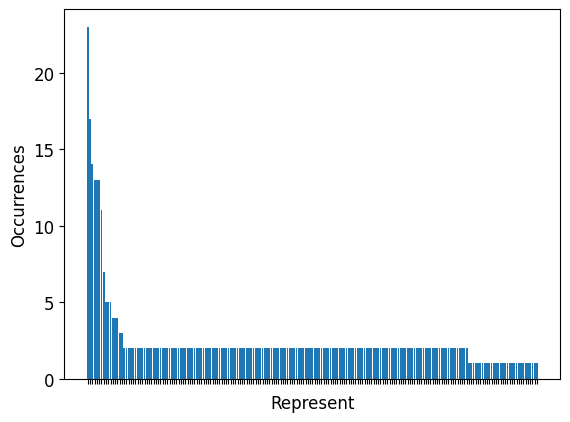

In [695]:
#Histogram
plt.bar(table['Representative'], table['Occurrences'])
plt.xlabel('Represent')
plt.ylabel('Occurrences')

plt.xticks(range(len(table)), [])

plt.savefig('all_occurences.png')
plt.show()